# Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project we will use a Long Short Term Memory networks – usually just called “LSTMs” to predict the closing price of the S&P 500 using a dataset of past prices.

In [13]:
# Importing our prediction model
from lib.Prediction_Models import *

## Building Basic LTSM Model

compilation time :  0.04213547706604004
Train on 2459 samples, validate on 130 samples
Epoch 1/1
2459/2459 [==============================] - 6s 2ms/step - loss: 0.0031 - val_loss: 4.5259e-04


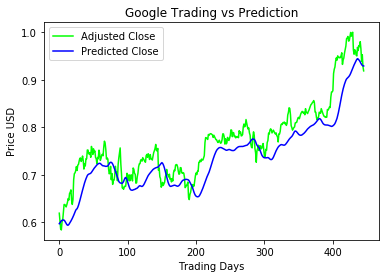

Train Score: 0.00036582 MSE (0.01912645 RMSE)
Test Score: 0.00199754 MSE (0.04469381 RMSE)


In [16]:
model = PredictionModel()
model.basic_LTSM_model()

compilation time :  0.042166948318481445
Train on 2459 samples, validate on 130 samples
Epoch 1/5
 - 5s - loss: 0.0077 - val_loss: 2.6630e-04
Epoch 2/5
 - 3s - loss: 8.7385e-04 - val_loss: 3.7431e-04
Epoch 3/5
 - 3s - loss: 7.4897e-04 - val_loss: 6.4958e-04
Epoch 4/5
 - 3s - loss: 6.5406e-04 - val_loss: 2.7316e-04
Epoch 5/5
 - 3s - loss: 6.6075e-04 - val_loss: 2.8144e-04


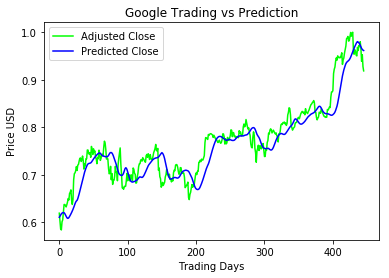

Train Score: 0.00032050 MSE (0.01790262 RMSE)
Test Score: 0.00102672 MSE (0.03204243 RMSE)


In [17]:
model = PredictionModel()
model.improved_LTSM_model()

In [18]:
import pandas as pd
from lib.preprocess_data import remove_data, get_normalised_data
from lib.stock_data_parser import unroll
data = pd.read_csv('data/google-misc.csv')
stocks = remove_data(data)

stocks = get_normalised_data(stocks)
stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].as_matrix()
Y = stocks[:]['Close'].values

X = unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.123901  0.000000  0.606442
1  0.000000  0.174601  1.000000
2  0.010989  0.112263  0.921928
3  0.093132  0.291229  0.575381
4  0.243819  0.430228  0.366556
(12, 1, 3)
(12,)


/home/awr417/Projects/python/py_virtual_env/ml_ai_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/awr417/Projects/python/py_virtual_env/ml_ai_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


AttributeError: 'PredictionModel' object has no attribute 'predict'